In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#import csv
casino = pd.read_csv('JitteredHeadCount.csv')
casino.loc[:, 'date'] = pd.to_datetime(casino.loc[:, 'DateFormat'])
casino.set_index('DateFormat', inplace = True)

In [16]:
casino.head()

,GameCode,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber,date
DateFormat,,,,,,,,,
9/16/2011,BA,6,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,7,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,8,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,9,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,10,0,1,0,0,6,47,2011-09-16


In [17]:
#understand the data
casino.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [18]:
#check data shape and types
print(casino.shape)
print(casino.dtypes)

(175677, 9)
GameCode                object
Hour                     int64
TablesOcc                int64
TablesOpen               int64
TablesClosed             int64
HeadCount                int64
DayOfWeek                int64
DayNumber                int64
date            datetime64[ns]
dtype: object


In [19]:
#print name of columns. This is helpful to quickly use column names
casino.columns

Index(['GameCode', 'Hour', 'TablesOcc', 'TablesOpen', 'TablesClosed',
       'HeadCount', 'DayOfWeek', 'DayNumber', 'date'],
      dtype='object')

In [20]:
#understand first 10 rows of data
casino.head(10)

,GameCode,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber,date
DateFormat,,,,,,,,,
9/16/2011,BA,6,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,7,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,8,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,9,0,0,1,0,6,47,2011-09-16
9/16/2011,BA,10,0,1,0,0,6,47,2011-09-16
9/16/2011,BA,11,0,1,0,0,6,47,2011-09-16
9/16/2011,BA,12,0,1,0,0,6,47,2011-09-16
9/16/2011,BA,13,0,1,0,0,6,47,2011-09-16
9/16/2011,BA,14,0,1,0,0,6,47,2011-09-16


In [8]:
#change Dataformat to datetime format to be used for time series analysis
# casino.loc[:, 'DateFormat'] = pd.to_datetime(casino.loc[:, 'DateFormat'])
# print(casino.dtypes)

GameCode                object
DateFormat      datetime64[ns]
Hour                     int64
TablesOcc                int64
TablesOpen               int64
TablesClosed             int64
HeadCount                int64
DayOfWeek                int64
DayNumber                int64
dtype: object


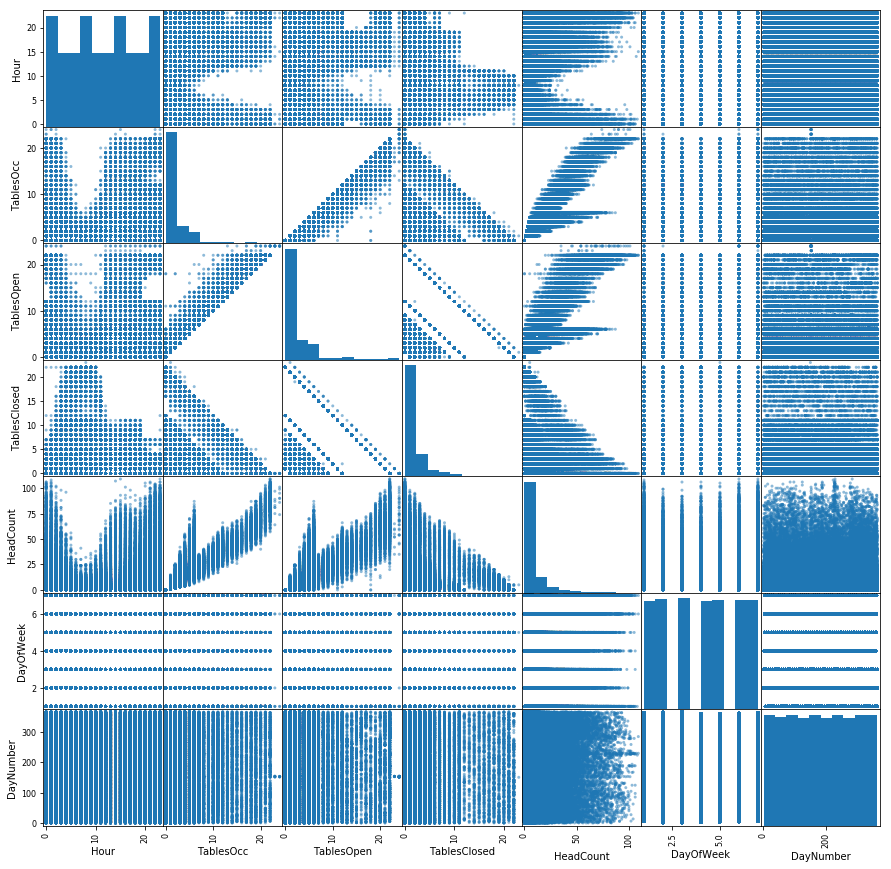

In [10]:
pd.plotting.scatter_matrix(casino, figsize=(15, 15))
plt.show()

**Time series**

In [21]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
casino.plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

ValueError: view limit minimum -36735.75 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10f00f620> (for post_execute):


ValueError: view limit minimum -36735.75 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36735.75 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 576x432 with 1 Axes>

**Open vs. Occupied** - consider size 

Text(0,0.5,'Tables Occupied')

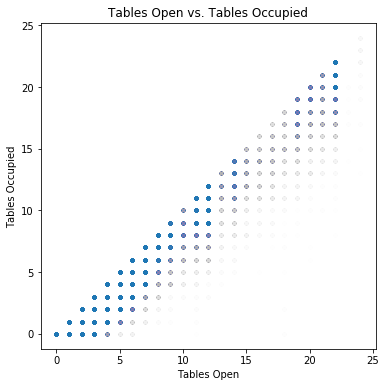

In [35]:
ax = plt.figure(figsize=(6,6)).gca()
casino.plot.scatter(x = 'TablesOpen', y = 'TablesOcc', ax = ax, alpha = 0.003)
ax.set_title('Tables Open vs. Tables Occupied')
ax.set_xlabel('Tables Open')
ax.set_ylabel('Tables Occupied')

Text(0.5,1,'Time series of sunspots')

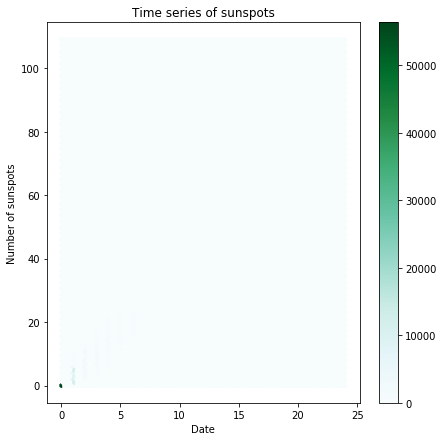

In [40]:
ax = plt.figure(figsize=(7, 7)).gca() # define axis
casino.plot.hexbin(x = 'TablesOcc', y = 'HeadCount', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

**Tables open, occupied over time**

**Tables Occ vs. Headcount**

Text(0,0.5,'Headcount')

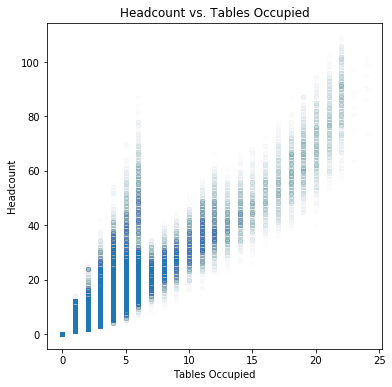

In [36]:
ax = plt.figure(figsize=(6,6)).gca()
casino.plot.scatter(x = 'TablesOcc', y = 'HeadCount', ax = ax, alpha = 0.008)
ax.set_title('Headcount vs. Tables Occupied')
ax.set_xlabel('Tables Occupied')
ax.set_ylabel('Headcount')

**Headcount vs. Hour**

In [41]:
casino['counts'] = 1

Text(0,0.5,'Headcount')

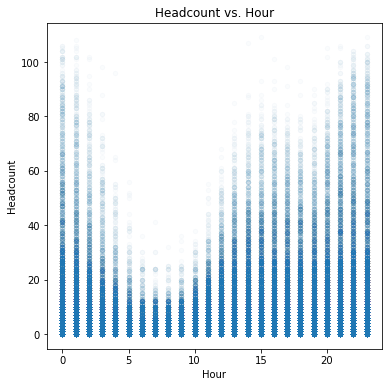

In [48]:
ax = plt.figure(figsize=(6,6)).gca()
casino.plot.scatter(x = 'Hour', y = 'HeadCount', ax = ax, alpha = .02)
ax.set_title('Headcount vs. Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Headcount')

**headcount by gametype**

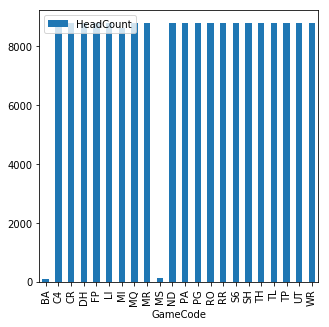

In [43]:
ax = plt.figure(figsize=(5, 5)).gca() # define axis
casino.loc[:, ['GameCode', 'HeadCount']].groupby(['GameCode']).agg('count').plot.bar(ax = ax)

**headcount by day of week**

Text(0.5,1,'Time series of sunspots')

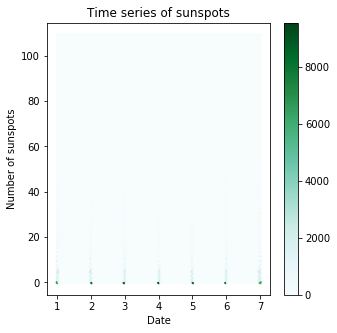

In [69]:
ax = plt.figure(figsize=(5, 5)).gca() # define axis
casino.plot.hexbin(x = 'DayOfWeek', y = 'HeadCount', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

**headcount, tablesopen, game** - where are people playing? - consider add shape, size

In [29]:
import seaborn as sns

Text(0.5,1,'Auto Price vs. City MPG \n with fuel type by color')

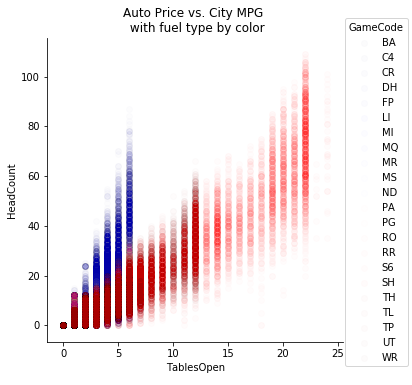

In [49]:
sns.lmplot(x = 'TablesOpen', y = 'HeadCount', 
       data = casino, 
       hue = "GameCode", 
       palette="seismic", 
       scatter_kws={'alpha':0.01},
       fit_reg = False)
plt.xlabel('TablesOpen')
plt.ylabel('HeadCount')
plt.title('Auto Price vs. City MPG \n with fuel type by color')

**Tables open by hour** - does this align to headcount?

Text(0.5,1,'Time series of sunspots')

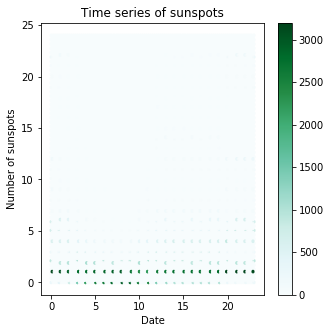

In [46]:
ax = plt.figure(figsize=(5, 5)).gca() # define axis
casino.plot.hexbin(x = 'Hour', y = 'TablesOpen', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')